In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Short_order_dataset_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       2245 non-null   int64  
 1   CustomerID    2245 non-null   int64  
 2   UnitsOrdered  2245 non-null   int64  
 3   Discount      2245 non-null   float64
 4   Description   2245 non-null   object 
 5   Gender        2245 non-null   object 
 6   UnitPrice     2245 non-null   int64  
 7   Name          2245 non-null   object 
 8   City          2245 non-null   object 
 9   State         2245 non-null   object 
 10  full_date     2245 non-null   object 
 11  year          2245 non-null   int64  
 12  month         2245 non-null   int64  
 13  day           2245 non-null   int64  
 14  Revenue       2245 non-null   float64
dtypes: float64(2), int64(7), object(6)
memory usage: 263.2+ KB


<Axes: >

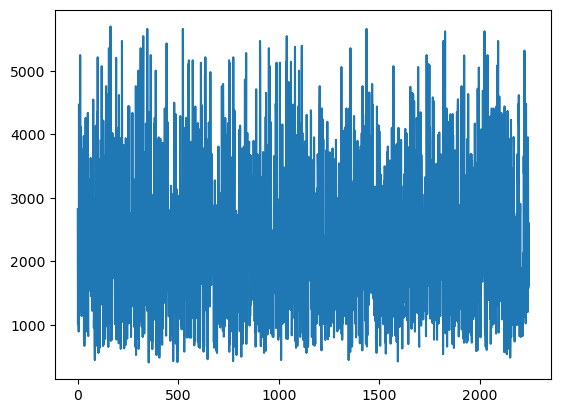

In [3]:
df.Revenue.plot()

In [4]:
df['full_date'] = pd.to_datetime(df['full_date'])
df_daily = df.groupby(df['full_date'].dt.date).agg({'Revenue': 'sum'}).reset_index()
df_daily['full_date'] = pd.to_datetime(df_daily['full_date'])
df_daily.set_index('full_date', inplace=True)
df_daily

,Revenue
full_date,
2012-01-02,5801.0
2012-01-03,3668.0
2012-01-05,7940.0
2012-01-07,2385.0
2012-01-08,2275.0
...,...
2016-12-19,2212.0
2016-12-20,7886.0
2016-12-24,3321.0


In [5]:
df_daily = df_daily.asfreq('D')
df_daily.isna().sum()

Revenue    553
dtype: int64

In [6]:
df_daily.fillna(0, inplace=True)
df_daily.isna().sum()

Revenue    0
dtype: int64

In [7]:
size = int(len(df_daily)*0.8)
size

1458

In [8]:
df_train = df_daily.iloc[:size]
df_train

,Revenue
full_date,
2012-01-02,5801.0
2012-01-03,3668.0
2012-01-04,0.0
2012-01-05,7940.0
2012-01-06,0.0
...,...
2015-12-25,0.0
2015-12-26,4788.0
2015-12-27,0.0


In [9]:
df_test = df_daily.iloc[size:]
df_test

,Revenue
full_date,
2015-12-30,0.0
2015-12-31,0.0
2016-01-01,3125.0
2016-01-02,0.0
2016-01-03,5661.0
...,...
2016-12-24,3321.0
2016-12-25,0.0
2016-12-26,1577.0


<font size="5">
Checking if data is stationary using Dickey-Fuller (ADF) test

In [11]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df_daily.Revenue)

(-42.56003043464878,
 0.0,
 0,
 1822,
 {'1%': -3.4339441475744668,
  '5%': -2.8631276157416945,
  '10%': -2.5676151930364455},
 33805.99615638008)

<font size="5">
Conducting Auto-correlation function (ACF)

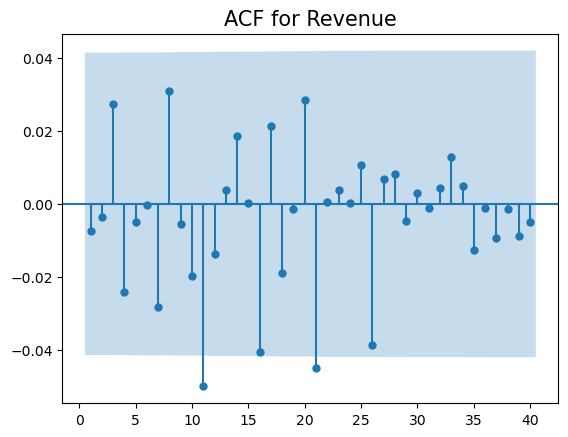

In [13]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.Revenue, lags = 40, zero = False)
plt.title("ACF for Revenue", size = 15)
plt.autoscale()
plt.show()

<font size="5">
ARIMA model training iterations

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
model_ar_1_i_1_ma_1 = ARIMA(df_train.Revenue, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 1458
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13722.290
Date:                Thu, 17 Oct 2024   AIC                          27450.579
Time:                        15:17:20   BIC                          27466.432
Sample:                    01-02-2012   HQIC                         27456.493
                         - 12-29-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0044      0.021      0.208      0.835      -0.037       0.045
ma.L1         -1.0000      0.025    -39.669      0.000      -1.049      -0.951
sigma2      8.833e+06   2.84e-09   3.11e+15      0.000    8.83e+06    8.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               793.00
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+29. Standard errors may be unstable.
"""

In [17]:
model_ar_3_i_3_ma_2 = ARIMA(df_daily.Revenue, order = (3,3,2))
results_ar_3_i_3_ma_2 = model_ar_3_i_3_ma_2.fit()
results_ar_3_i_3_ma_2.summary()

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 1823
Model:                 ARIMA(3, 3, 2)   Log Likelihood              -17561.431
Date:                Thu, 17 Oct 2024   AIC                          35134.863
Time:                        15:17:22   BIC                          35167.902
Sample:                    01-02-2012   HQIC                         35147.052
                         - 12-28-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7520      0.045    -16.603      0.000      -0.841      -0.663
ar.L2         -0.5235      0.048    -10.999      0.000      -0.617      -0.430
ar.L3         -0.2799      0.046     -6.149      0.000      -0.369      -0.191
ma.L1         -1.9974      0.040    -50.241      0.000      -2.075      -1.919
ma.L2          0.9978      0.040     25.089      0.000       0.920       1.076
sigma2      2.386e+07   1.27e-09   1.88e+16      0.000    2.39e+07    2.39e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.46   Jarque-Bera (JB):               284.43
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.74
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.34e+31. Standard errors may be unstable.
"""

In [18]:
model_ar_2_i_2_ma_1 = ARIMA(df_daily.Revenue, order = (2,2,1))
results_ar_2_i_2_ma_1 = model_ar_2_i_2_ma_1.fit()
results_ar_2_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 1823
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -17426.371
Date:                Thu, 17 Oct 2024   AIC                          34860.742
Time:                        15:17:23   BIC                          34882.771
Sample:                    01-02-2012   HQIC                         34868.869
                         - 12-28-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6571      0.019    -34.487      0.000      -0.694      -0.620
ar.L2         -0.3408      0.019    -18.233      0.000      -0.377      -0.304
ma.L1         -1.0000      0.027    -37.696      0.000      -1.052      -0.948
sigma2      1.197e+07   2.22e-09    5.4e+15      0.000     1.2e+07     1.2e+07
===================================================================================
Ljung-Box (L1) (Q):                  16.94   Jarque-Bera (JB):               237.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.64
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.23e+29. Standard errors may be unstable.
"""

<font size="5">
Conducting log-likelyhood test

In [20]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return print("p value is:",p)

In [21]:
LLR_test(model_ar_3_i_3_ma_2, model_ar_2_i_2_ma_1, DF = 3)

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p value is: 0.0


<font size="5">
Forecasting

In [23]:
df_train.tail()

,Revenue
full_date,
2015-12-25,0.0
2015-12-26,4788.0
2015-12-27,0.0
2015-12-28,1715.0
2015-12-29,0.0


In [24]:
start_index = "2015-12-30"
end_index = "2016-2-28"

In [25]:
df_pred = results_ar_3_i_3_ma_2.predict(start = start_index, end = end_index)
df_pred

full_date
2015-12-30    1720.260079
2015-12-31     399.610396
2016-01-01     458.726231
2016-01-02     758.851065
2016-01-03     694.370659
                 ...     
2016-02-24    2365.730556
2016-02-25    2555.254724
2016-02-26    2586.683730
2016-02-27     278.560134
2016-02-28     293.728908
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

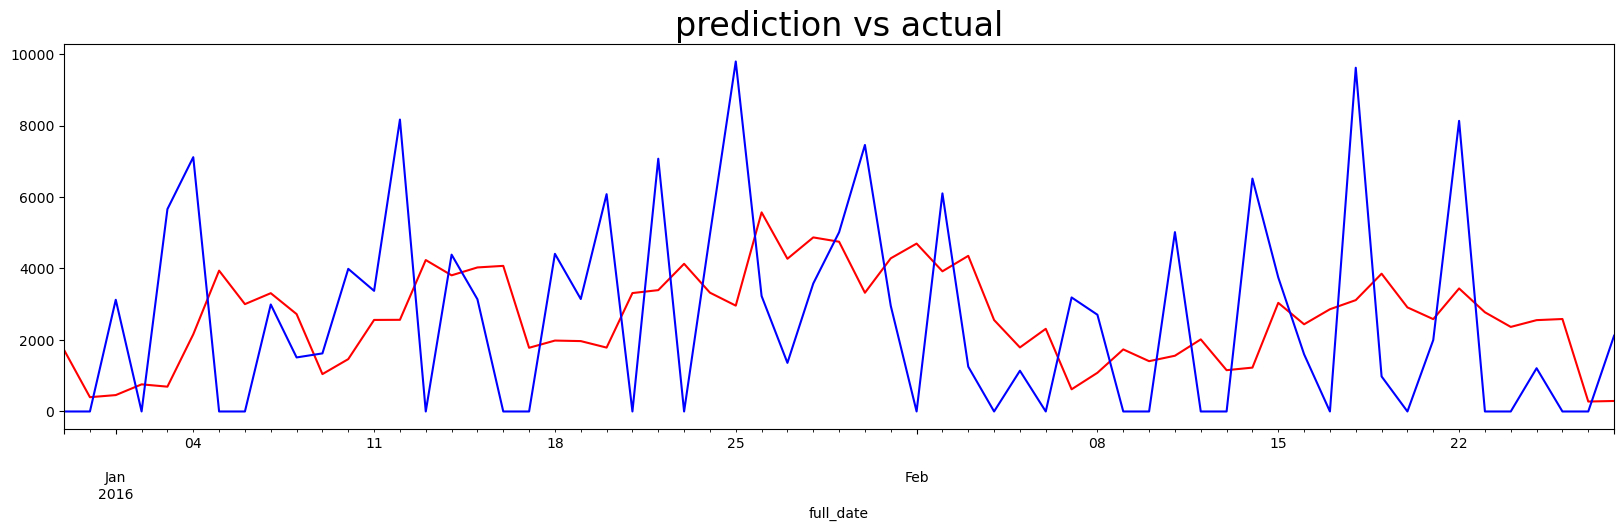

In [26]:
df_pred[start_index:end_index].plot(figsize = (20,5), color = "red")
df_test.Revenue[start_index:end_index].plot(color = "blue")
plt.title("prediction vs actual", size = 24)
plt.show()

<font size="5">
Trying Auto-ARIMA

In [28]:
from pmdarima.arima import auto_arima

In [29]:
model_auto = auto_arima(df_train.Revenue)
model_auto

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [30]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1458
Model:                        SARIMAX   Log Likelihood              -13728.360
Date:                Thu, 17 Oct 2024   AIC                          27460.719
Time:                        15:17:26   BIC                          27471.289
Sample:                    01-02-2012   HQIC                         27464.663
                         - 12-29-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2938.5185     98.727     29.764      0.000    2745.017    3132.020
sigma2      8.832e+06   2.72e+05     32.413      0.000     8.3e+06    9.37e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               849.30
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
df_pred_auto = model_auto.predict(start = start_index, end = end_index)
df_pred_auto

2015-12-30    2938.518519
2015-12-31    2938.518519
2016-01-01    2938.518519
2016-01-02    2938.518519
2016-01-03    2938.518519
2016-01-04    2938.518519
2016-01-05    2938.518519
2016-01-06    2938.518519
2016-01-07    2938.518519
2016-01-08    2938.518519
Freq: D, dtype: float64

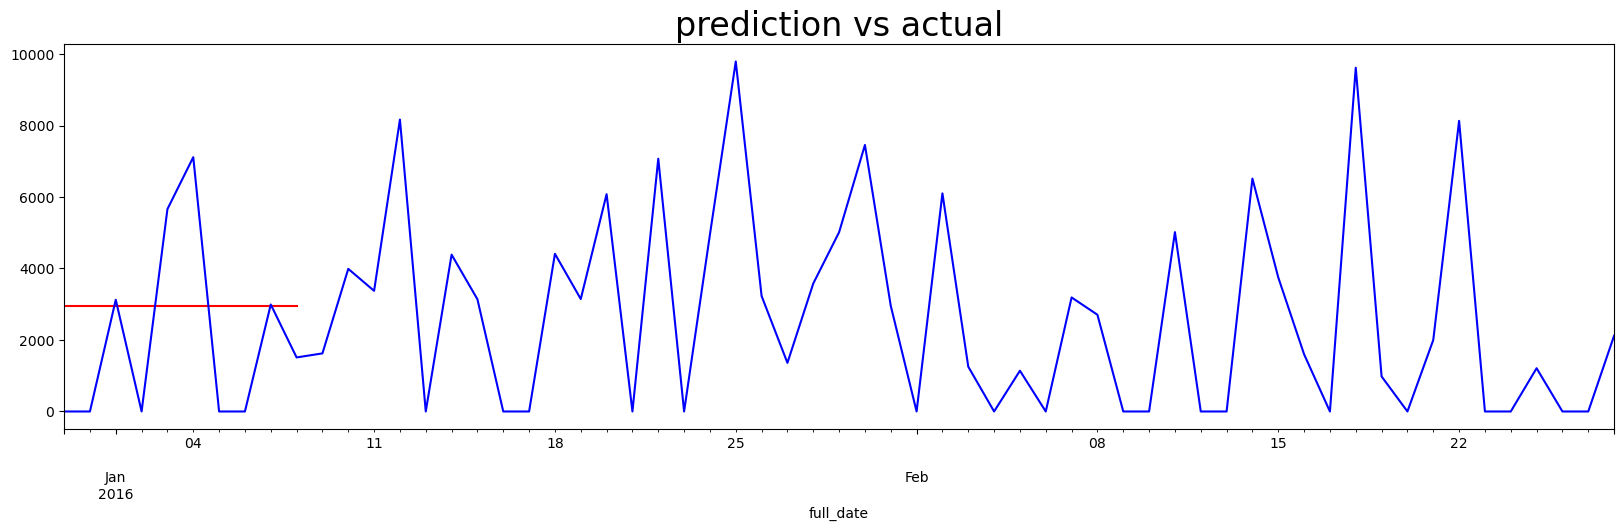

In [32]:
df_pred_auto[start_index:end_index].plot(figsize = (20,5), color = "red")
df_test.Revenue[start_index:end_index].plot(color = "blue")
plt.title("prediction vs actual", size = 24)
plt.show()

In [33]:
df_train.mean()

Revenue    2938.518519
dtype: float64

<font size="8">
Performance metrics

<font size="5">
Mean absolute error

In [36]:
from sklearn.metrics import mean_absolute_error

# Actual and predicted values
y_true = df_test.Revenue[start_index:end_index]
y_pred = df_pred[start_index:end_index]

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"MAE: {mae}")

MAE: 2502.6340699910684


<font size="5">
Mean squared error

In [38]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")

MSE: 8836807.42915931


<font size="5">
Root mean squared error

In [40]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

RMSE: 2972.676812093657


<font size="5">
R-squared

In [42]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = -r2_score(y_true, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.13457797666927673


<font size="5">
Logging model with its parameters and metrics to MLFLOW

In [44]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000/") 

# Start a new MLflow run
with mlflow.start_run():
    mlflow.log_param("model_type", "ARIMA")
    # Log metrics
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r-squared", r2)
    #Log parameters
    mlflow.log_param("p", 3)
    mlflow.log_param("d", 3)
    mlflow.log_param("q", 2)
    
    # Log the model itself
    mlflow.sklearn.log_model(model_ar_3_i_3_ma_2, "model")

2024/10/17 15:17:28 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/10/17 15:17:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10

In [45]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


In [46]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from pmdarima.arima import auto_arima

# Load dataset
@st.cache
def load_data():
    df = pd.read_csv('Short_order_dataset_final.csv')
    df['full_date'] = pd.to_datetime(df['full_date'])
    df_daily = df.groupby(df['full_date'].dt.date).agg({'Revenue': 'sum'}).reset_index()
    df_daily['full_date'] = pd.to_datetime(df_daily['full_date'])
    df_daily.set_index('full_date', inplace=True)
    df_daily = df_daily.asfreq('D')
    df_daily.fillna(0, inplace=True)
    return df_daily

df_daily = load_data()

st.title("Revenue Time Series Analysis")

# Plot the data
st.subheader("Revenue Over Time")
st.line_chart(df_daily['Revenue'])

# Stationarity Test
st.subheader("Dickey-Fuller Test for Stationarity")
adf_result = sts.adfuller(df_daily['Revenue'])
st.write(f"ADF Statistic: {adf_result[0]}")
st.write(f"p-value: {adf_result[1]}")
st.write("Critical Values:")
for key, value in adf_result[4].items():
    st.write(f'   {key}: {value}')

# ACF Plot
st.subheader("Auto-Correlation Function (ACF)")
fig, ax = plt.subplots()
sgt.plot_acf(df_daily['Revenue'], lags=40, zero=False, ax=ax)
st.pyplot(fig)

# Split data into train and test
size = int(len(df_daily) * 0.8)
df_train, df_test = df_daily.iloc[:size], df_daily.iloc[size:]

# ARIMA Model
st.subheader("ARIMA Model (1,1,1)")
model_arima = ARIMA(df_train['Revenue'], order=(1, 1, 1))
results_arima = model_arima.fit()
st.write(results_arima.summary())

# Prediction
st.subheader("ARIMA Prediction vs Actual")
start_index = "2015-12-30"
end_index = "2016-02-28"
pred_arima = results_arima.predict(start=start_index, end=end_index)

fig, ax = plt.subplots(figsize=(12, 6))
df_test['Revenue'][start_index:end_index].plot(ax=ax, label="Actual", color="blue")
pred_arima.plot(ax=ax, label="ARIMA Predictions", color="red")
plt.title("ARIMA Model: Prediction vs Actual", size=24)
plt.legend()
st.pyplot(fig)

# Auto-ARIMA Model
st.subheader("Auto-ARIMA Model")
model_auto_arima = auto_arima(df_train['Revenue'], trace=True, error_action='ignore', suppress_warnings=True)
st.write(model_auto_arima.summary())

# Auto-ARIMA Prediction
st.subheader("Auto-ARIMA Prediction vs Actual")
pred_auto_arima = model_auto_arima.predict(n_periods=len(df_test[start_index:end_index]))

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_test['Revenue'][start_index:end_index], label="Actual", color="blue")
plt.plot(df_test[start_index:end_index].index, pred_auto_arima, label="Auto-ARIMA Predictions", color="red")
plt.title("Auto-ARIMA Model: Prediction vs Actual", size=24)
plt.legend()
st.pyplot(fig)

# Show training data stats
st.subheader("Training Data Statistics")
st.write(df_train.describe())


Overwriting app.py


In [47]:
#password local tunnel
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 156.214.214.197


In [ ]:
!streamlit run app.py